# χ² DISTRIBUSION AND χ² TEST
2020.01.23


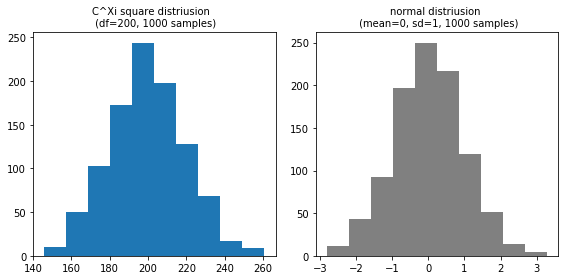

In [4]:
"""
    _______________________________
    
    
        Chi-squere distribusion

    _______________________________
    
    * SciPy               https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html
    
    * Returned Value:     sum of squared x-es, 
      --------------      number o x-es is == df
                          each x is an inpendent random variable drawn from norm dist. mean=0, sd=1
                          
                          calles also: central chi-square distribution
                        
                          
                          eg: 
                              > np.random.chisquare(df=1)
                                #       returns one squared number taken from normasl.dist 
                                        (m=0,sd=1)
                              > np.random.chisquare(df=1, size=10)
                                #       returns ten numbers, each taken from normasl.dist (m=0,sd=1), 
                                        each squared independently
                              > np.random.chisquare(df=2, size=10)
                                #       returns ten numbers, 
                                        each, being a sum of two numbers taken 
                                        from normasl.dist (m=0,sd=1), and then squared
                              >  np.random.chisquare(df=2, size=(2,2))
                                 #      array([[0.47729153, 0.33627468],
                                             [0.16338193, 0.81028513]])
          
    *  Returned Value Features:
       - all returned values are ≥0 
       - mean value foloows df == By the central limit theorem, because the chi-square distribution is the sum of k's
         independent random variables with finite mean and variance, it converges to a normal distribution for large k
         THUS:
             for k>50, the difference is ignored and we use normal distribusion instead!
       - The sampling distribution of ln (X^2) converges to normality faster then sampling distr. of X^2 values
         because the assymetry is being removed!
       
    * Applications!
      -------------
        -  chi-square tests
        -  estimating variances.
        
        -  ANOVA - Analysis of Variance
            here F-distribution, is the distribution of the ratio of two independent chi-squared random variables, 
            each divided by their respective degrees of freedom.     
        - Often: the chi-square distribution arises from a Gaussian-distributed sample

        - Xi^2 distrib arrises for:
            - sum of squared errors
            - through the sample variance.
    


    * Two flavors:
      -----------
        A) central chi-square distribution
            - whther each returned value is the squared norm of a random vector with N(0'k, I'k)
              where values I'k-0'k are the values drawn from norm. distribusion. k-times independently.
              other def: (the squared distance from the origin to a point taken at random from that distribution)

        B) non-central chi.square distr.
           essentially, its the same as in A, howver here we measure distance 
           from the origine to multiple points created by the multivariate distrib.
           - non-central ... is the squared norm of a random vector with N(\mu, I'k), 
             where mu is the mean of x-es taken, and I'k is identity arr of size k, (one summ for each vecto:P)
             

"""

import numpy as np
import matplotlib.pyplot as plt

a = np.random.chisquare(df=2) # return a sinlge variable, size=None
a = np.random.chisquare(df=2, size=1000)
a = np.random.chisquare(df=2, size=(2,2))

# plot: 1000 values taken form x^2 vs normal distrib
fig= plt.figure(figsize=(8,4))

ax = fig.add_subplot(121)
a = np.random.chisquare(df=200, size=1000)
ax.hist(a)
ax.set_title("C^Xi square distriusion  \n (df=200, 1000 samples)", fontsize=10)

### normal distr
ax = fig.add_subplot(122)
b = np.random.randn(1000)
ax.hist(b, color="grey")
ax.set_title("normal distriusion \n (mean=0, sd=1, 1000 samples)", fontsize=10)
plt.tight_layout()




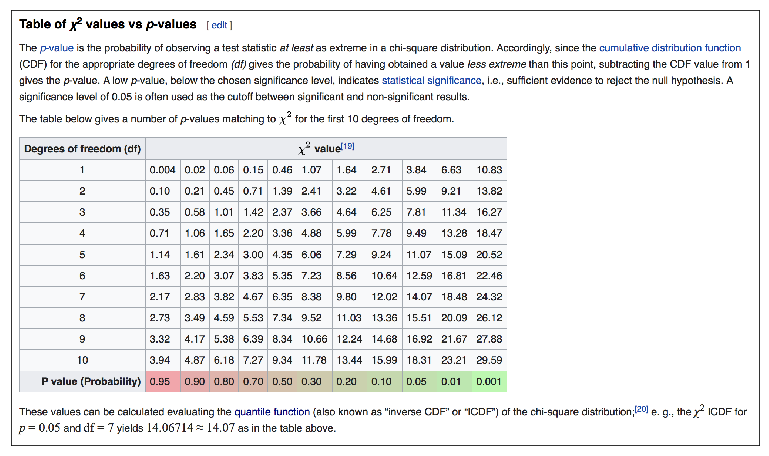

In [5]:
"""
        _______________________________
    
    
           Pearson - Chi-squeared Test

        _______________________________
    
    
    # ... Caution ...................................................................................
    
        name "chi-2 test", is used for many different tests, in which sampling distribusion
          approximates a chi-2 distribution more and more closely as the sample size gets larger
            eg: Yates, likelihood ratio, portmanteau test in time series, etc...
            
            
        THIS IS ONLY ONE SITET TEST !
  
  
   # ... Pearson test - three types of comparisons can be done wqith it ......................................  

         - 1 - goodness of fit, , gof of a statistical model describes 
                                 how well that model fits a set of empirical observations
                                     >> TEST >> 
                                 whether an observed frequency distribution 
                                 differs from a theoretical distribution.
                                 
         - 2 - homogeneity,     , homogenity is the statistical property of a dataset, 
                                 for which any given part of that dataset is not signifficantly different 
                                 form the other part of that dataset
                                    >> TEST >>
                                  compares the distribution of counts for two or more groups 
                                  using the same categorical variable!
                                  (e.g. choice of activity—college, military, employment)
                                
        - 3 -  independence,    , Two events are statistically independent, 
                                 if the occurrence of one does not affect 
                                 the probability of occurrence of the other
                                    >> TEST >>
                                 assesses whether observations consisting of measures on two variables, 
                                 expressed in a contingency table, are independent of each other 
                                 (e.g. polling responses from people of different nationalities 
                                 to see if one's nationality is related to the response).
    
    


    # ... Pearson test - practical ...................................................................
    
        * Goal
            -  to determine whether there is a statistically significant difference 
               between the expected frequencies and the observed frequencies 
               in one or more categories used to create a contingency table.

        * Input data
            - categorical data: 
              observations classified into two or more mutually exlusive classes

        * Assumtions:
            - independent normally distributed observations
                - independence test: there is chi-2 tests 
                  for testing the H0 of independence of a pair of random variables 
                  based on observations of the pairs
            - events considered must be mutually exclusive and have total probability 1!
            - minimum count per cell 
                - ≥10 for each category in contigency table, never less then 5
            - minimum sample size
                - no number, but see i n the above

        * Hyphothesis
            - H0:  gives the probability that any observation 
                   falls into the corresponding class

        * Evaluation (p value interpretation)
            - "how likely the observations that are made would be, 
               assuming the null hypothesis is true"

        * Parameters of Chi-squared distribusion:
            - df - just one in central-chi^2 test
            
            
        * Xi^2 distrib arrises for:
            - sum of squared errors
            - through the sample variance.


    # ... Pearson test - Procedure ...................................................................

        *   Step 1
            Calculate the chi-squared test statistic, χ², 
            which resembles a normalized sum of squared deviations 
            between observed and theoretical frequencies (see below).
            
        *.  Step 2
            Determine the degrees of freedom, df,
            - goodness-of-fit, df = # of Categoriess − # of Parameters
            - homogeneity,     df = (Rows − 1)×(Cols − 1)
                                     ,where: 
                                     Rows = # of categories, ie rows in contingency table
                                     Cols = # of independent groups ie. columns in ...
            - independence,    df = (Rows − 1)×(Cols − 1)
                                     ,where:  
                                      Rows = # of categories in one variable
                                      Cols = Number of categories in the second variable
                                     
        *.  Step 3
            Select a desired level of confidence
            (significance level, p-value or the corresponding alpha level)
            
        *.  Step 4
            Compare χ² to the critical value from the chi-squared distribution 
            with df degrees of freedom and the selected confidence level 
            (one-sided since the test is only one direction, 
            i.e. is the test value greater than the critical value?), 
            
        *.  Step 5
            sustaing or reject H0
            that the observed frequency distribution is the same as the theoretical 
            distribution based on whether the test statistic exceeds the critical value of χ².
            If the test statistic exceeds the critical value of χ², the null hypothesis
            H0 when χ²< critical value
            H1 when χ²≤ critical value
            

    # ... Pearson test - Problems ...................................................................

        *   Problem 2
            χ² doenst work with low frequencies
            -----------------------------------
            
            Recommendations
            - if df = 1, , frequenies should be >10%
            - if df > 1, , no more than 20% of the events should have expected frequencies below 5%!
            
            Solution:   Apply Yates's correction for continuity
                        a better approximation can be obtained by reducing the absolute value 
                        of each difference between observed and expected frequencies 
                        by 0.5 before squaring
  
        *   Problem 2 
            Small total sample size 
            -----------------------
            - Use binomial test
            - for contingency tables, use Fisher's exact test
   
   
        *   Problem 3   
            Expected values in. multinomial test are small
            ----------------------------------------------
            from small underlying population probability or a small number of observations
            - use the G-test, 
            - use likelihood ratio-based test statistic. 
            


    # ... EXAMPLES .......................................................................
        
        
        Example 1. Fairness of dice
                   ----------------

            Experiment  A 6-sided dice is thrown 60 times. 
                        The number of times it lands with 1, 2, 3, 4, 5 and 6 face up 
                        are  5, 8, 9, 8, 10 and 20, respectively

            Question:   Is the dice biased?

            Test:       Pearson's chi-squared test 
                        at significance level of 95% and/or 99%?

            -------------------------------
            
           H0 and Expected data (E),
           
                        H0:   the dice is unbiased,
                        E     having 6 outcomes, and 60 throws
                              we shoudl gave 10 of each number
                              
            Table
            ---------------------------------------------------------
            i       Oi     Ei      Oi-Ei   (0i-Ei)^2  ((Oi-Ei)^2)/Ei
            ---------------------------------------------------------
            1.      5.     10.       -5       25         2.5     
            2.      8.     10.       -2        4         0.4
            3.      9.     10.       -1        1         0.1
            4.      8.     10.       -2        4         0.4
            5.      10.    10.        0        0         0.0
            6.      20.    10.       10      100        10.0
            ---------------------------------------------------------
            n = 6                                  sum  13.4
            ---------------------------------------------------------
            df = 6 - 1 = 5 
            
            IN THAT TABLE WE SEE
                - one random variable with 6 different categories
            
        
            Upper-tail critical values of chi-square distribution table gives a critical value of 11.070 at 95% significance level
            here df = n-1 = 5
            


  
  
        Example 2. Goodness of fit
                   ---------------

            Experiment:  we randomly counted number of men 
                        and woman among 100 people crossing the street
                        
            Data:       - dtype: categorical with two classes (men. & woman)
                        - Observed data (0): number of mens and wonems in one group  
                        - theoretical/expected data (E): 
                            we expect to observe the equal number of men & women in that group
                        - Important: the frequencies of both theoretical and empirical distributions 
                          are unnormalised counts  for more see table below:                        
                        
            H0:         random sample of 100 people has been drawn from a population 
                        in which men and women are equal in frequency

            Test:       Pearson's chi-squared test 
                        at significance level of 95%
                                

            -------------------------------
            
           H0 and Expected data (E),
           
                        H0:   the dice is unbiased,
                        E     having 6 outcomes, and 60 throws
                              we shoudl gave 10 of each number
                              
            Table
            ---------------------------------------------------------
            i       Oi     Ei      Oi-Ei   (0i-Ei)^2  ((Oi-Ei)^2)/Ei
            ---------------------------------------------------------
            M.      44.     50.       -6       36         0.72     
            W.      56.     50.        6       36         0.72
            ---------------------------------------------------------
            n = 2                                  sum    1.44
            ---------------------------------------------------------
            df = 2 - 1 = 1
        
            Upper-tail critical values of chi-square distribution table 
            gives a critical value of 3.84 at 95% significance level
            
            Differently,, Consultation of the chi-squared distribution for 1 degree of freedom 
            shows that the probability of observing this difference 
            (or a more extreme difference than this) 
            if men and women are equally numerous in the population is approximately 0.23. 
            
            thus we can not reject H0





""";

# find your image
import os
path = "/Users/pawel/Desktop/Activities/005__COURSES/000__EPFLext_ADSML/EPFLext_NOTES/_____Figures_for_Jupyter_____"
os.chdir(path)

# import image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from pylab import imread,subplot,imshow,show

fig = plt.figure(figsize=(16,8))
axi = fig.add_subplot(111)
image = imread("chi_squared_table.jpg")
axi.imshow(image)
axi.set(xticks=[], yticks=[])
plt.show();